# **IMPORTING** **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pickle

# **IMPORTING DATASET**

In [2]:
# Import the kagglehub library to download datasets from Kaggle
import kagglehub
path = kagglehub.dataset_download("mansoordaku/ckdisease")
print(f"Dataset path is {path}")


c:\Users\arshi_zu3tb3q\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset path is C:\Users\arshi_zu3tb3q\.cache\kagglehub\datasets\mansoordaku\ckdisease\versions\1


In [3]:
# Traverse and display all file paths in the downloaded dataset directory to identify available data files
import os
for root,dirs,files in os.walk(path):
    for file in files:
        print(os.path.join(root,file))
print(os.listdir(path))

C:\Users\arshi_zu3tb3q\.cache\kagglehub\datasets\mansoordaku\ckdisease\versions\1\kidney_disease.csv
['kidney_disease.csv']


In [4]:
# Construct the full path to the CSV file and load the dataset into a pandas DataFramed
data = os.path.join(path, "kidney_disease.csv")
df = pd.read_csv(data)



# **BASIC DATA EXPLORATION**

In [5]:
# Displaying the rows of DataFrame
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# Displaying shape of the DataFrame
df.shape

(400, 26)

In [7]:
# Displaying columns of the DataFrame
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
# Renaming the columns
df.columns = ['patient ID', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell_count',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'classification']

In [9]:
df.drop('patient ID',axis = 1, inplace = True) # Patient Id is not necessary for model prediction

In [10]:
# Displaying the rows of DataFrame
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell_count,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell_count           335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# Generate descriptive statistics for all numerical columns in the DataFrame 
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
# Some medical features like packed_cell_volume, white_blood_cell_count, and red_blood_cell_count are mistakenly categorized as object types. Since these are numeric values, we'll convert them to appropriate numeric formats.
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [14]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell_count           335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [15]:
# Generate descriptive statistics for all numerical columns in the DataFrame 
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [16]:
# Extraction of numerical and catergorical coloumns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print("Categorical columns present in the dataset:",cat_cols)
print("Numerical columns present in the dataset:", num_cols)

Categorical columns present in the dataset: ['red_blood_cells', 'pus_cell_count', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']
Numerical columns present in the dataset: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [17]:
# Unique values in categorical columns
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell_count has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [18]:
## Rectifying the categorical columns classes
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes', ' yes' : 'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = {'\tno' : 'no'})
df['classification'] = df['classification'].replace(to_replace = {'ckd\t' : 'ckd'})

In [19]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell_count has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

classification has ['ckd' 'notckd'] values



# **Data Preprocessing**

In [20]:
df.isnull().any() # Allows to know if the data set contains missing values or not

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell_count              True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
classification             False
dtype: bool

In [21]:
df.isnull().sum() # Gives how many missing values are present in a particular feature

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell_count              65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [22]:
# Replacing Missing Values using Statistical imputations
pd.set_option('future.no_silent_downcasting', True)
# This line ensures that pandas throws a warning or error if it has to silently change data types during imputation.
# It helps avoid unintended "downcasting" of data types (e.g., from float64 to float32) when filling missing values.

df['blood_glucose_random'] = df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean())
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())
df['blood_urea'] = df['blood_urea'].fillna(df['blood_urea'].mean())
df['haemoglobin'] = df['haemoglobin'].fillna(df['haemoglobin'].mean())
df['packed_cell_volume'] = df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean())
df['potassium'] = df['potassium'].fillna(df['potassium'].mean())
df['red_blood_cell_count'] = df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean())
df['serum_creatinine'] = df['serum_creatinine'].fillna(df['serum_creatinine'].mean())
df['sodium'] = df['sodium'].fillna(df['sodium'].mean())
df['white_blood_cell_count'] = df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean())

In [23]:
# Filling missing values using the most frequent value (mode)

df['age'] = df['age'].fillna(df['age'].mode()[0])
df['hypertension'] = df['hypertension'].fillna(df['hypertension'].mode()[0])
df['pus_cell_clumps'] = df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0])
df['appetite'] = df['appetite'].fillna(df['appetite'].mode()[0])
df['albumin'] = df['albumin'].fillna(df['albumin'].mode()[0])
df['pus_cell_count'] = df['pus_cell_count'].fillna(df['pus_cell_count'].mode()[0])
df['red_blood_cells'] = df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0])
df['coronary_artery_disease'] = df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0])
df['bacteria'] = df['bacteria'].fillna(df['bacteria'].mode()[0])
df['anemia'] = df['anemia'].fillna(df['anemia'].mode()[0])
df['sugar'] = df['sugar'].fillna(df['sugar'].mode()[0])
df['diabetes_mellitus'] = df['diabetes_mellitus'].fillna(df['diabetes_mellitus'].mode()[0])
df['pedal_edema'] = df['pedal_edema'].fillna(df['pedal_edema'].mode()[0])
df['specific_gravity'] = df['specific_gravity'].fillna(df['specific_gravity'].mode()[0])

In [24]:
#Checking for NaN values
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell_count             0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [25]:
# All missing values are now replaced with mean or mode respectively according to particular feature

# **Exploratory Data Analysis (EDA)**

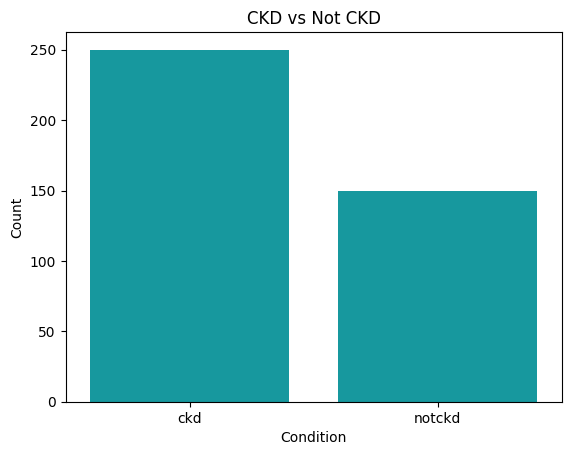

In [26]:
# Countplot for target variable
sns.countplot(x='classification', data=df, color = '#00ADB5')
plt.title("CKD vs Not CKD")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

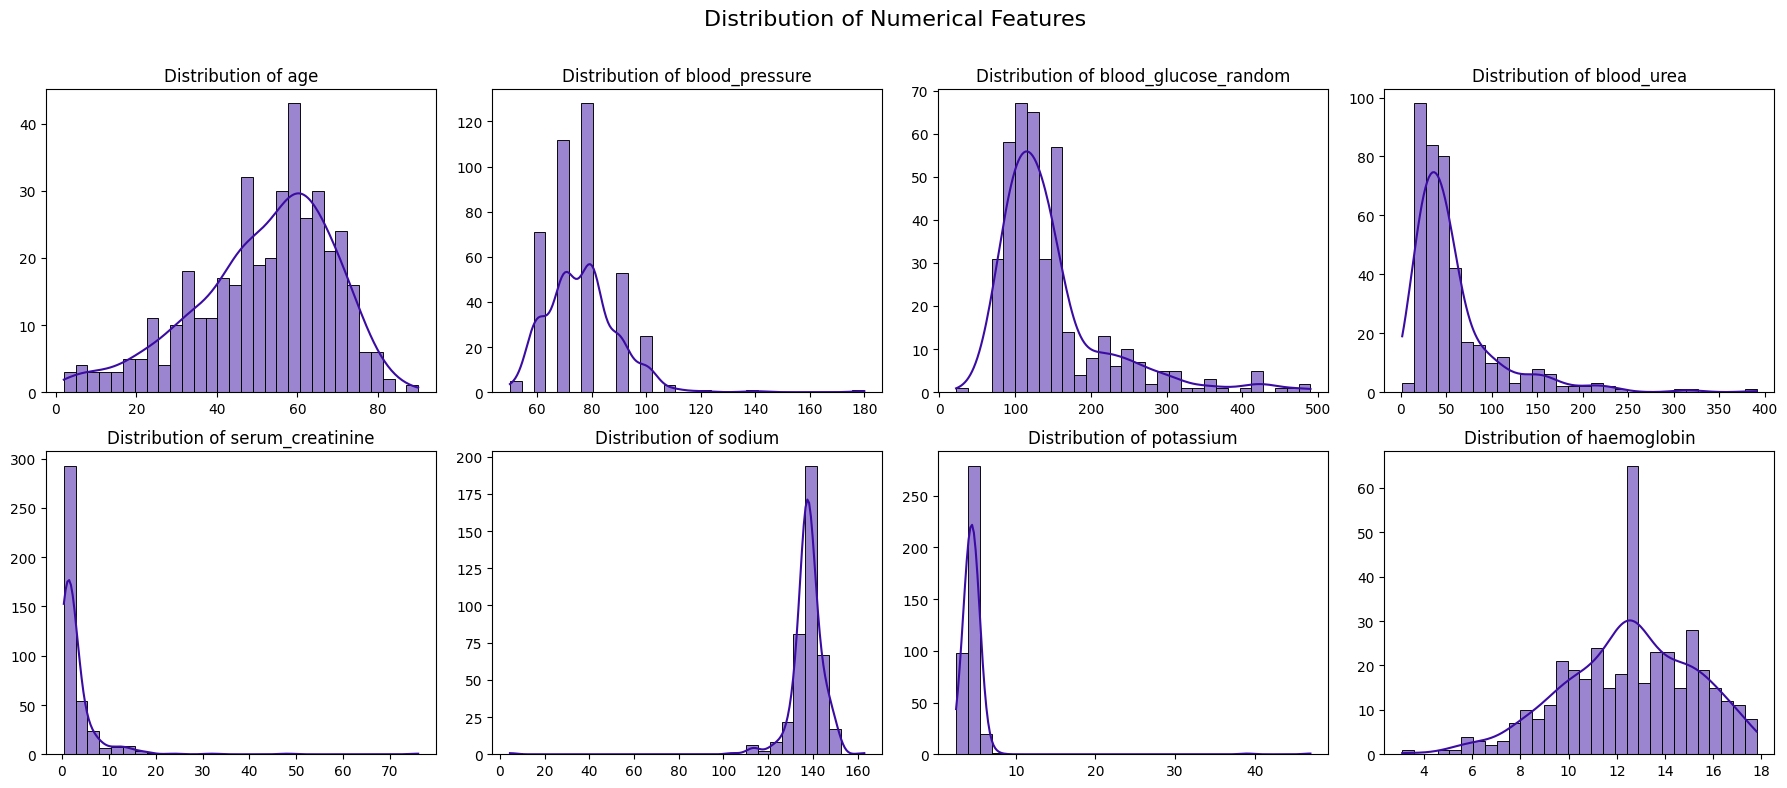

In [27]:
# Distribution of numerical features
numerical_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']

# Add this line to create subplot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

# Flatten axes array for easy access
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color = '#3A0CA3')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

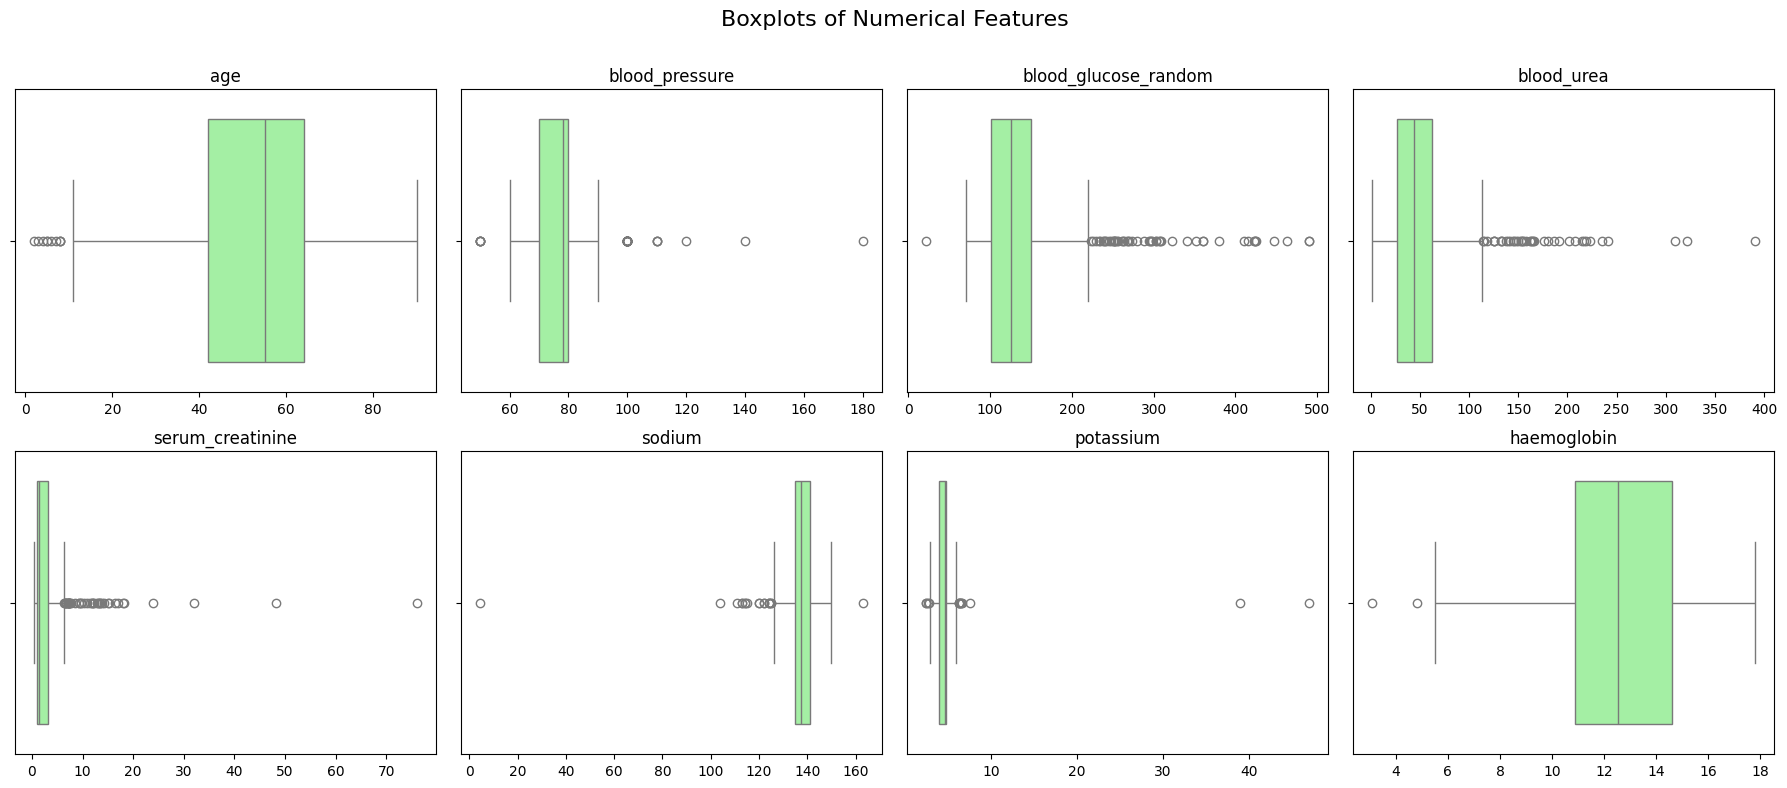

In [28]:
# Boxplots to visualize outliers
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
fig.suptitle("Boxplots of Numerical Features", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='palegreen')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


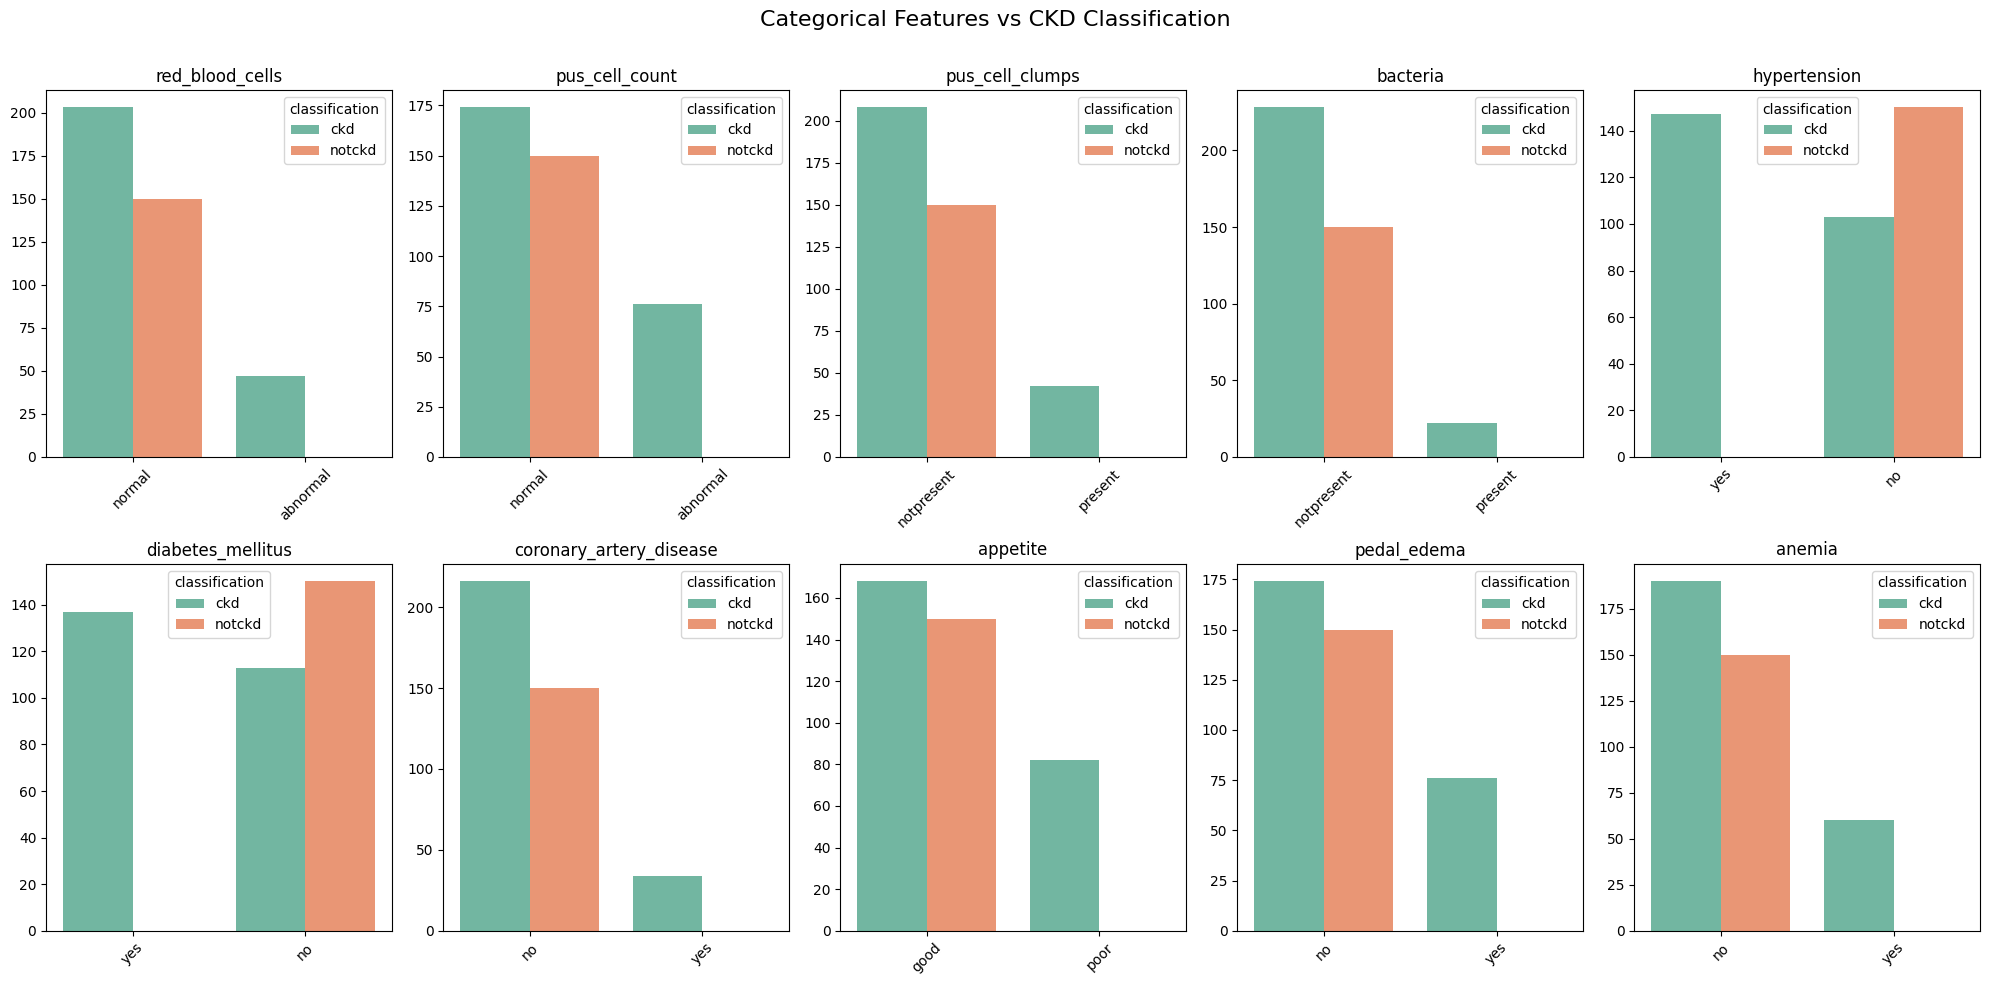

In [29]:
# Barplots of categorical features vs CKD classification
categorical_cols = ['red_blood_cells', 'pus_cell_count', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                    'appetite', 'pedal_edema', 'anemia']

# Create subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle("Categorical Features vs CKD Classification", fontsize=16)
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='classification', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


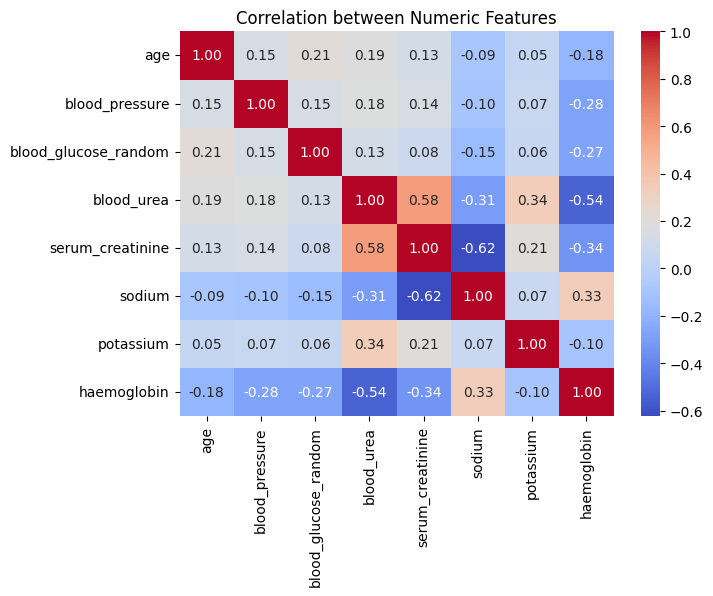

In [30]:
# Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()


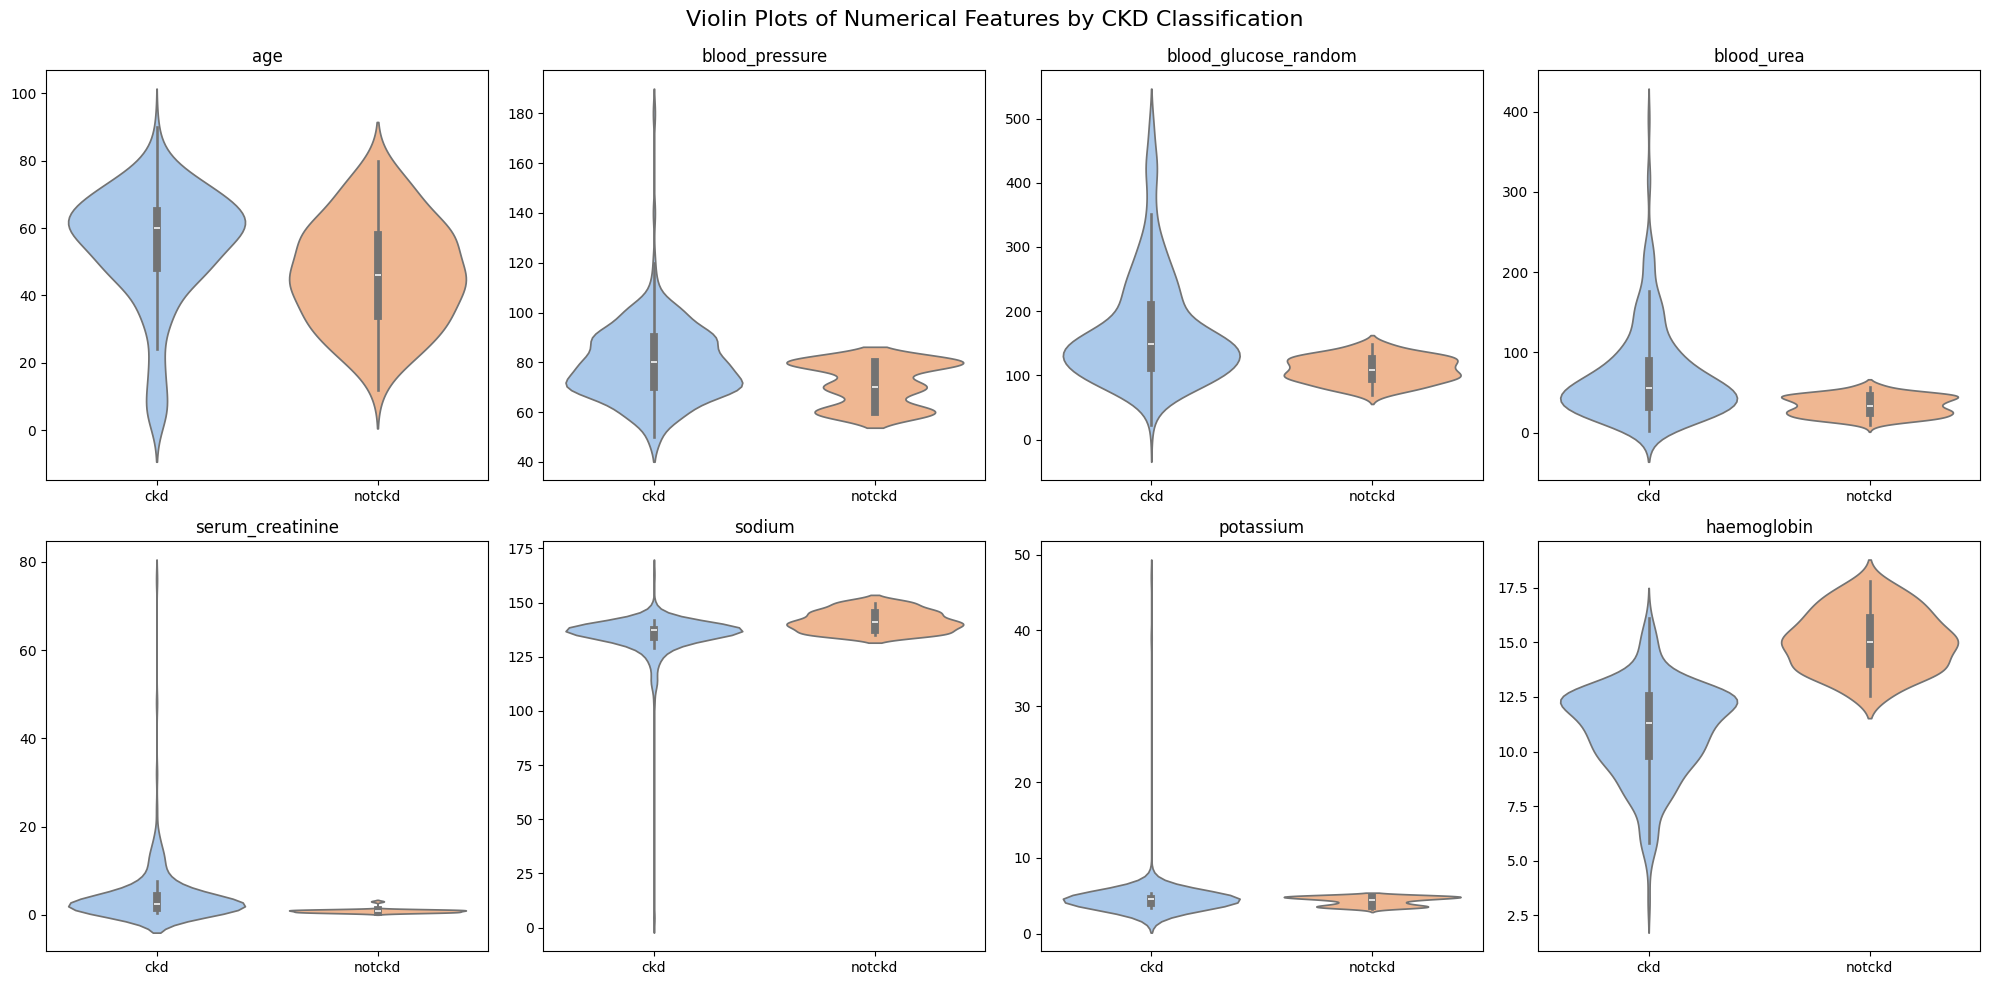

In [31]:
# Violin plots for numerical features with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
fig.suptitle("Violin Plots of Numerical Features by CKD Classification", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='classification', y=col, hue='classification', data=df, ax=axes[i],
                   palette='pastel', legend=False)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


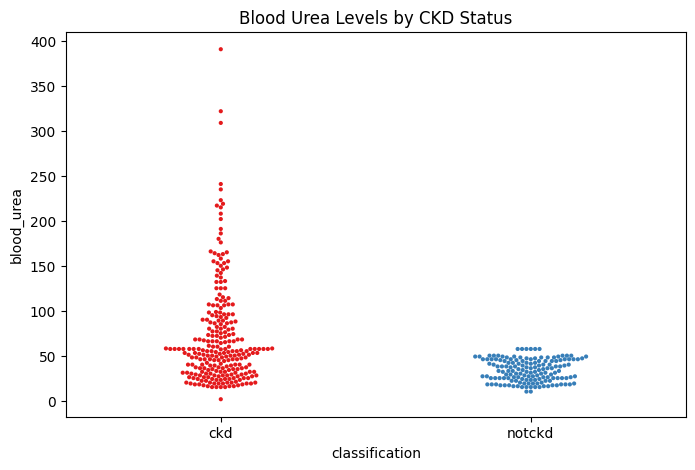

In [32]:
# Swarmplot showing the distribution and individual variation of blood urea levels across CKD and non-CKD patients
plt.figure(figsize=(8, 5))
sns.swarmplot(x='classification', y='blood_urea', hue='classification', data=df, palette='Set1', size=3, legend=False)
plt.title("Blood Urea Levels by CKD Status")
plt.show()


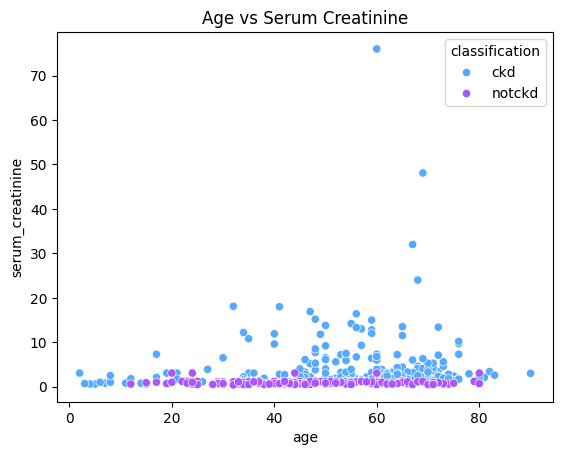

In [33]:
# Scatter plot to compare two numerical features
sns.scatterplot(x='age', y='serum_creatinine', hue='classification', data=df, palette='cool')
plt.title("Age vs Serum Creatinine")
plt.show()


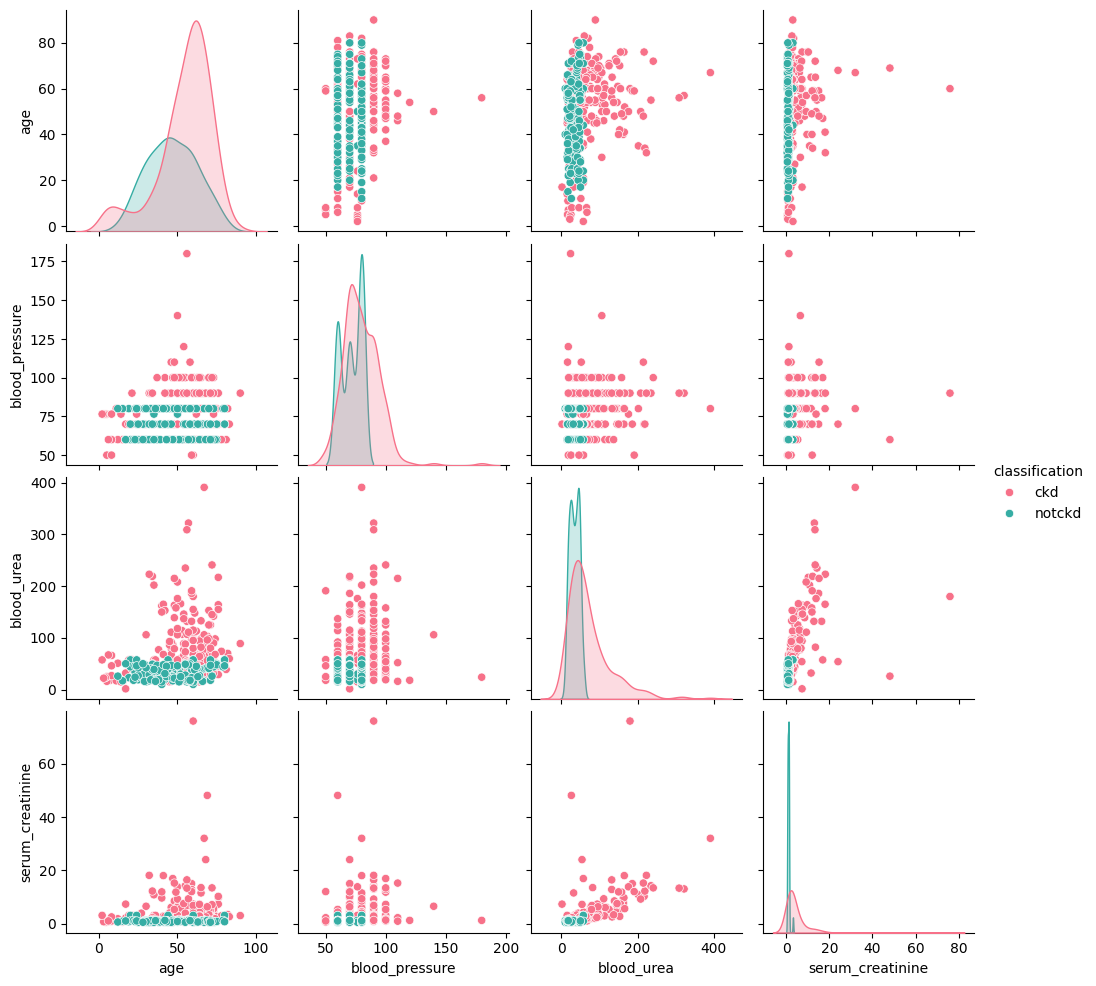

In [34]:
# Pairplot of selected numerical features
sns.pairplot(df[['age', 'blood_pressure', 'blood_urea', 'serum_creatinine', 'classification']], hue='classification', palette='husl')


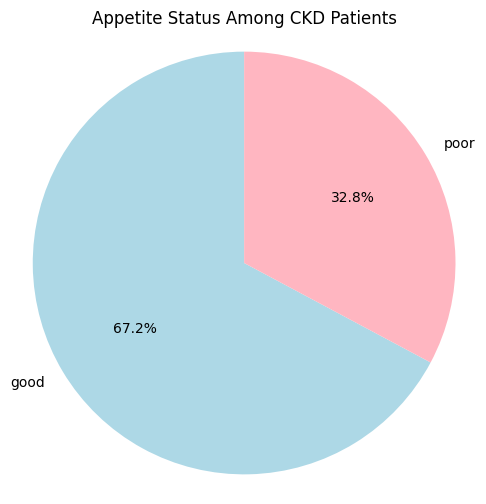

In [35]:
# Pie chart showing appetite levels among CKD patients
ckd_appetite = df[df['classification'] == 'ckd']['appetite'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(ckd_appetite, labels=ckd_appetite.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Appetite Status Among CKD Patients')
plt.axis('equal')
plt.show()


### **MODEL BUILDING**

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

df_encoded = df.copy()
le_dict = {}

# Label Encode All Object Columns (before train-test split!)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' and col != 'classification':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        le_dict[col] = le  # Store encoder for later use (prediction)

# Encode the target variable
le_target = LabelEncoder()
df_encoded['classification'] = le_target.fit_transform(df_encoded['classification'])

# Define features and target
X_full = df_encoded.drop('classification', axis=1)
y = df_encoded['classification']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Apply RFE
X_train_cols = X_train.columns
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=8)
rfe.fit(X_train, y_train)

# Select final features
selected_features = X_train_cols[rfe.get_support()]
print("Selected Features:", selected_features.tolist())

# Overwrite X_train/X_test
X_train = X_train[selected_features]
X_test = X_test[selected_features]



Selected Features: ['specific_gravity', 'albumin', 'blood_glucose_random', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count', 'hypertension']


### **KNN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search with 5-fold cross-validation
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

# Best model from grid search
best_knn = grid_knn.best_estimator_

# Predictions and evaluation
y_pred_knn = best_knn.predict(X_test)

print(" Best Hyperparameters:", grid_knn.best_params_)
print(f" Training Accuracy: {accuracy_score(y_train, best_knn.predict(X_train))}")
print(f" Test Accuracy: {accuracy_score(y_test, y_pred_knn)}\n")

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\n Classification Report:\n", classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
 Training Accuracy: 0.96875
 Test Accuracy: 0.9875

 Confusion Matrix:
 [[51  1]
 [ 0 28]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### **Decision Tree Classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=0)
dtc.fit(X_train, y_train)

# Accuracy score, confusion matrix and classification report of decision tree

y_pred_dtc = dtc.predict(X_test) 

dtc_acc = accuracy_score(y_test, y_pred_dtc)

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred_dtc)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred_dtc)}")

Training Accuracy of Decision Tree Classifier is 0.984375
Test Accuracy of Decision Tree Classifier is 0.9875 

Confusion Matrix :- 
[[51  1]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [39]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7],
    'max_features' : ['sqrt', 'log2', None]
}

# Create GridSearchCV object for Decision Tree
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=5,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.990625


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Define a Decision Tree with limited depth
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, y_train)

# Evaluate on train and test sets
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train)):.4f}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc:.4f} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, dtc.predict(X_test))}")

# Cross-Validation Accuracy
cv_scores_dtc = cross_val_score(dtc, X_full[selected_features], y, cv=5)
print(f"Cross-Validation Accuracy of Decision Tree (5-Fold): {cv_scores_dtc.mean():.4f}")



Training Accuracy of Decision Tree Classifier is 0.9938
Test Accuracy of Decision Tree Classifier is 0.9875 

Confusion Matrix :- 
[[51  1]
 [ 0 28]]

Classification Report :- 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Cross-Validation Accuracy of Decision Tree (5-Fold): 0.9725


## **Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Define the model
rf = RandomForestClassifier(random_state=0)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt'],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4],
    'criterion': ['gini']
}

# Grid search
grid_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_rf.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train, best_rf.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-validation accuracy
cv_rf = cross_val_score(best_rf, X_full[selected_features], y, cv=5)
print(f"Cross-Validation Accuracy (5-Fold): {cv_rf.mean():.4f}")



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
Training Accuracy: 0.9938
Test Accuracy: 0.9875

Confusion Matrix:
 [[51  1]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Cross-Validation Accuracy (5-Fold): 0.9825


### **ADABoost Classifier**

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Base estimator (a shallow tree)
base_dtc = DecisionTreeClassifier(random_state=0)

# AdaBoost classifier with base decision tree
ada = AdaBoostClassifier(estimator=base_dtc, random_state=0)

# Parameter grid including base estimator hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3, 4],
    'estimator__min_samples_split': [2, 5],
    'estimator__criterion': ['gini', 'entropy']
}

# Grid search
grid_ada = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_ada.fit(X_train, y_train)

# Best model
best_ada = grid_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

# Evaluation
print(" Best Hyperparameters:", grid_ada.best_params_)
print(f" Training Accuracy: {accuracy_score(y_train, best_ada.predict(X_train))}")
print(f" Test Accuracy: {accuracy_score(y_test, y_pred_ada)}\n")

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("\n Classification Report:\n", classification_report(y_test, y_pred_ada))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
 Best Hyperparameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 4, 'estimator__min_samples_split': 2, 'learning_rate': 1, 'n_estimators': 50}
 Training Accuracy: 1.0
 Test Accuracy: 0.9875

 Confusion Matrix:
 [[51  1]
 [ 0 28]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# **Gradient Boost**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define model
gb = GradientBoostingClassifier(random_state=0)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_gb = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_gb.fit(X_train, y_train)

# Best model
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Evaluation
print(" Best Hyperparameters:", grid_gb.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train, best_gb.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_gb)}\n")

print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Training Accuracy: 1.0
Test Accuracy: 0.9875

 Confusion Matrix:
 [[51  1]
 [ 0 28]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



## **Stochastic Gradient Boosting**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Boosted model
sgb = GradientBoostingClassifier(random_state=0)

# Hyperparameter grid
param_grid = {
    'n_estimators': [30, 50],
    'learning_rate': [0.01],
    'max_depth': [2],
    'subsample': [0.5],
    'max_features': [0.5],
    'min_samples_split': [6],
    'min_samples_leaf': [4]
}

# Stratified CV
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_sgb = GridSearchCV(sgb, param_grid, cv=cv_strategy, n_jobs=-1, verbose=1)
grid_sgb.fit(X_train, y_train)

# Best model
best_sgb = grid_sgb.best_estimator_
y_pred_sgb = best_sgb.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_sgb.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train, best_sgb.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_sgb):.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sgb))

# Cross-validation accuracy
cv_sgb = cross_val_score(best_sgb, X_full[selected_features], y, cv=cv_strategy)
print(f"Cross-Validation Accuracy (5-Fold Stratified): {cv_sgb.mean():.4f}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 50, 'subsample': 0.5}
Training Accuracy: 0.9781
Test Accuracy: 0.9875

Confusion Matrix:
 [[51  1]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Cross-Validation Accuracy (5-Fold Stratified): 0.9675


## **XGBoost Classifier**




In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define base model
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=0)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 1],
    'gamma': [0, 1, 5]
}

# Grid Search
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print(" Best Hyperparameters:", grid_xgb.best_params_)
print(f" Training Accuracy: {accuracy_score(y_train, best_xgb.predict(X_train))}")
print(f" Test Accuracy: {accuracy_score(y_test, y_pred_xgb)}\n")
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
 Best Hyperparameters: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
 Training Accuracy: 0.996875
 Test Accuracy: 0.9875

 Confusion Matrix:
 [[51  1]
 [ 0 28]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



c:\Users\arshi_zu3tb3q\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## **CAT Boost Classifier**

In [47]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels 
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Base CatBoost model
cat = CatBoostClassifier(verbose=0, random_state=0)

# Hyperparameter grid
param_grid = {
    'iterations': [50, 100],
    'learning_rate': [0.01, 0.05],
    'depth': [2, 3, 4],
    'l2_leaf_reg': [3, 5, 7]
}

# Grid Search
grid_cat = GridSearchCV(cat, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_cat.fit(X_train, y_train_enc)

# Best model
best_cat = grid_cat.best_estimator_
y_pred_cat = best_cat.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_cat.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train_enc, best_cat.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_enc, y_pred_cat):.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_cat))

# Cross-validation accuracy
cv_cat = cross_val_score(best_cat, X_full[selected_features], le.transform(y), cv=5)
print(f"Cross-Validation Accuracy (5-Fold): {cv_cat.mean():.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Training Accuracy: 0.9938
Test Accuracy: 0.9875

Confusion Matrix:
 [[51  1]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Cross-Validation Accuracy (5-Fold): 0.9800


### **Extra Trees Classifier**

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Label encoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Base model
etc = ExtraTreesClassifier(random_state=0)

# Hyperparameter grid
param_grid = {
    'n_estimators': [30, 40],
    'max_depth': [2],
    'min_samples_split': [6],
    'min_samples_leaf': [4, 6],
    'max_features': [0.4],
    'criterion': ['gini']
}

# Stratified CV
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_etc = GridSearchCV(etc, param_grid, cv=cv_strategy, n_jobs=-1, verbose=1)
grid_etc.fit(X_train, y_train_enc)

# Best model
best_etc = grid_etc.best_estimator_
y_pred_etc = best_etc.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_etc.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train_enc, best_etc.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_enc, y_pred_etc):.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_etc))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_etc))

# Cross-validation accuracy
cv_etc = cross_val_score(best_etc, X_full[selected_features], le.transform(y), cv=cv_strategy)
print(f"Cross-Validation Accuracy (5-Fold): {cv_etc.mean():.4f}")








Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 0.4, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 40}
Training Accuracy: 0.9812
Test Accuracy: 1.0000

Confusion Matrix:
 [[52  0]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Cross-Validation Accuracy (5-Fold): 0.9750


##**LGBM CLASSIFIER**

In [49]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode y 
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Base model
lgbm = LGBMClassifier(random_state=0)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [2, 3],
    'num_leaves': [7, 15],
    'min_child_samples': [15, 30],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Grid Search
grid_lgbm = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_lgbm.fit(X_train, y_train_enc)

# Best model
best_lgbm = grid_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_lgbm.best_params_)
print(f"Training Accuracy: {accuracy_score(y_train_enc, best_lgbm.predict(X_train)):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test_enc, y_pred_lgbm):.4f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred_lgbm))

# Cross-validation accuracy
cv_lgbm = cross_val_score(best_lgbm, X_full[selected_features], le.transform(y), cv=5)
print(f"Cross-Validation Accuracy (5-Fold): {cv_lgbm.mean():.4f}")



Fitting 5 folds for each of 128 candidates, totalling 640 fits
[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381250 -> initscore=-0.484246
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

### **COMPARISON AND PREDICTION**

In [50]:
# Create a DataFrame to compare the performance of multiple classification models

models = pd.DataFrame({
    'Model': [
        'KNN',
        'Decision Tree Classifier',
        'Random Forest Classifier',
        'Ada Boost Classifier',
        'Gradient Boosting Classifier',
        'Stochastic Gradient Boosting',
        'XGBoost',
        'CatBoost',
        'Extra Trees Classifier',
        'LightGBM'
    ],
    'Score': [
        accuracy_score(y_test_enc, y_pred_knn),
        accuracy_score(y_test_enc, y_pred_dtc),
        accuracy_score(y_test_enc, y_pred_rf),
        accuracy_score(y_test_enc, y_pred_ada),
        accuracy_score(y_test_enc, y_pred_gb),
        accuracy_score(y_test_enc, y_pred_sgb),
        accuracy_score(y_test_enc, y_pred_xgb),
        accuracy_score(y_test_enc, y_pred_cat),
        accuracy_score(y_test_enc, y_pred_etc),
        accuracy_score(y_test_enc, y_pred_lgbm)
    ]
}).sort_values(by='Score', ascending=False)  # Sort models by accuracy in descending order

print(models)


                          Model   Score
8        Extra Trees Classifier  1.0000
0                           KNN  0.9875
1      Decision Tree Classifier  0.9875
2      Random Forest Classifier  0.9875
3          Ada Boost Classifier  0.9875
4  Gradient Boosting Classifier  0.9875
5  Stochastic Gradient Boosting  0.9875
6                       XGBoost  0.9875
7                      CatBoost  0.9875
9                      LightGBM  0.9875


In [51]:
# Comparitive plot for all models
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',title = 'Models Comparison')


In [52]:
import pandas as pd

selected_features = [
    'specific_gravity',
    'albumin',
    'blood_glucose_random',
    'serum_creatinine',
    'haemoglobin',
    'packed_cell_volume',
    'red_blood_cell_count',
    'hypertension'
]

# Create dictionary to hold user input
input_dict = {}

print("Please enter the following values:\n")

# Ask for input feature-by-feature
for feature in selected_features:
    if feature in le_dict:
        # Categorical input
        options = le_dict[feature].classes_.tolist()
        val = input(f"{feature} (options: {options}): ").strip()
        input_dict[feature] = val
    else:
        # Numerical input
        val = input(f"{feature} (numeric): ")
        try:
            input_dict[feature] = float(val)
        except:
            print(f"Invalid input for {feature}. Exiting.")
            exit()

# Convert to DataFrame
input_df = pd.DataFrame([input_dict])

# Encode categorical inputs using stored label encoders
for col in input_df.columns:
    if col in le_dict:
        input_df[col] = le_dict[col].transform(input_df[col])

# Ensure correct feature order
input_df = input_df[selected_features]

# Predict using trained best model 
best_model = best_sgb  

prediction = best_model.predict(input_df)
predicted_label = le_target.inverse_transform(prediction)[0]  

# Output prediction
print("\nPredicted Classification:", predicted_label.upper())


Please enter the following values:


Predicted Classification: NOTCKD


In [53]:
import pickle

# Save the trained model
with open('CKD.pkl', 'wb') as f:
    pickle.dump(best_sgb, f)

# Save the label encoders used for input features
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le_dict, f)

# Save the label encoder used for target output
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(le_target, f)

print("✅ Model and encoders saved successfully!")


✅ Model and encoders saved successfully!
